In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import yfinance as yf

In [2]:
rbc = yf.Ticker("RY.TO")
rbc_df = rbc.history(period='max')
rbc_df = rbc_df.drop(columns=["Dividends", "Stock Splits"])
rbc_df = rbc_df.loc['2010':'2021']
rbc_df.rename(columns = {"Close": "RBC Close"},  inplace = True)
rbc_df = rbc_df.dropna()
rbc_df["Target Close"] = rbc_df['RBC Close'].shift(periods=-1)
rbc_df.rename(columns = {"Close": "RBC Close"},  inplace = True)
rbc_df.head()

,Open,High,Low,RBC Close,Volume,Target Close
Date,,,,,,
2010-01-04,36.236009,36.403172,35.773092,36.403172,2768000,35.843815
2010-01-05,36.403171,36.634629,35.811668,35.843815,2699300,35.580208
2010-01-06,35.715224,35.805235,35.432332,35.580208,3513800,35.612362
2010-01-07,35.522351,35.695945,35.310180,35.612362,2229500,35.548061
2010-01-08,35.458050,35.728083,35.400186,35.548061,1953500,35.483765


In [3]:
vix = yf.Ticker("^VIX")
vix_df = vix.history(period='max')
vix_df = pd.DataFrame(vix_df["Close"])
vix_df = vix_df.loc['2010':'2020']
vix_df = vix_df.dropna()
vix_df.rename(columns = {"Close": "Vix Close"},  inplace = True)
vix_df.head()

,Vix Close
Date,
2010-01-04,20.040001
2010-01-05,19.350000
2010-01-06,19.160000
2010-01-07,19.059999
2010-01-08,18.129999


In [4]:
td = yf.Ticker("TD.TO")
td_df = td.history(period='max')
td_df = pd.DataFrame(td_df["Close"])
td_df = td_df.loc['2010':'2020']
td_df = td_df.dropna()
td_df.rename(columns = {"Close": "TD Close"},  inplace = True)
td_df.head()

,TD Close
Date,
2010-01-04,21.732552
2010-01-05,21.523972
2010-01-06,21.312069
2010-01-07,21.126659
2010-01-08,21.100180


In [5]:
cad = yf.Ticker("CAD=X")
cad_df = cad.history(period='max')
cad_df = pd.DataFrame(cad_df["Close"])
cad_df = cad_df.loc['2010':'2020']
cad_df = cad_df.dropna()
cad_df.rename(columns = {"Close": "CAD Close"},  inplace = True)
cad_df.head()

,CAD Close
Date,
2010-01-01,1.0512
2010-01-04,1.0410
2010-01-05,1.0395
2010-01-06,1.0319
2010-01-07,1.0340


In [6]:
tsx = yf.Ticker("^GSPTSE")
tsx_df = tsx.history(period='max')
tsx_df = pd.DataFrame(tsx_df["Close"])
tsx_df = tsx_df.loc['2010':'2020']
tsx_df = tsx_df.dropna()
tsx_df.rename(columns = {"Close": "TSX Close"},  inplace = True)
tsx_df.head()

,TSX Close
Date,
2010-01-04,11866.900391
2010-01-05,11888.099609
2010-01-06,11944.500000
2010-01-07,11887.500000
2010-01-08,11953.799805


In [7]:
rbcmodel_df = pd.concat([rbc_df, vix_df, td_df, cad_df, tsx_df], axis=1, join="inner")
rbcmodel_df = rbcmodel_df.dropna()

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt

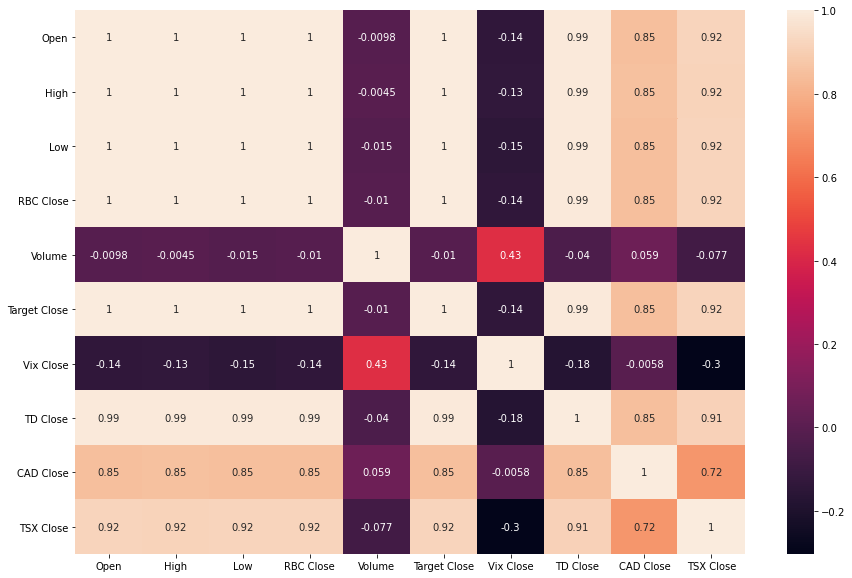

In [9]:
corrmat = rbcmodel_df.corr()
fig, heat = plt.subplots(figsize = (15, 10))
heat = sn.heatmap(corrmat, annot=True)
plt.show()

In [10]:
rbc_df = rbcmodel_df[["High", "Low", "Vix Close", "TD Close", "CAD Close", "TSX Close", "RBC Close"]]
rbc_df

,High,Low,Vix Close,TD Close,CAD Close,TSX Close,RBC Close
Date,,,,,,,
2010-01-04,36.403172,35.773092,20.040001,21.732552,1.04100,11866.900391,36.403172
2010-01-05,36.634629,35.811668,19.350000,21.523972,1.03950,11888.099609,35.843815
2010-01-06,35.805235,35.432332,19.160000,21.312069,1.03190,11944.500000,35.580208
2010-01-07,35.695945,35.310180,19.059999,21.126659,1.03400,11887.500000,35.612362
2010-01-08,35.728083,35.400186,18.129999,21.100180,1.02980,11953.799805,35.548061
...,...,...,...,...,...,...,...
2020-12-23,104.889999,103.550003,23.309999,70.967941,1.28933,17593.599609,104.860001
2020-12-24,105.010002,104.360001,21.530001,71.096558,1.28455,17623.900391,104.910004
2020-12-29,105.680000,104.639999,23.080000,71.373581,1.28400,17543.400391,105.199997


In [11]:
rbc_csv_data = rbc_df.to_csv('rbc.csv', index = True) 